In [ ]:
#import 

import pandas as pd
import numpy as np
import os


#import data

In [131]:
train = pd.read_csv(r"C:\Users\sabar\OneDrive\Desktop\Sowjanya\Pluralsight\python-data-science\titanic_data\titanic\train.csv", index_col= "PassengerId")
test  = pd.read_csv(r"C:\Users\sabar\OneDrive\Desktop\Sowjanya\Pluralsight\python-data-science\titanic_data\titanic\test.csv",index_col= "PassengerId")

In [ ]:
#help(pd.read_csv)

In [ ]:
# check type
type(train)

## Basic structure

In [ ]:
#use .info() to get brief info on dataframe
train.info()

In [ ]:
test.info()

In [132]:
test['Survived'] = -888 # adding default value to time being

In [133]:
#combine train and test data
df = pd.concat ((train,test) , axis=0) # axis =0 mean train data will place on top of test data, 
                                        #axis =1 means train data is placed side of test data.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [ ]:
df.head(6)

In [ ]:
df.tail()# default returns last 5 data rows

# Selecting column

In [ ]:
#selecting column data with dot
df.Name

In [ ]:
# selecting column with string
df['Name']

In [ ]:
df[['Name', 'Age']]

# Indexing

In [ ]:
#indexing using loc for label based indexing
df.loc[5:10,]

In [ ]:
#selecting column range
df.loc[5:10,'Pclass': 'Age']

In [ ]:
#selecting discrete columns
df.loc[5:10, ['Survived', 'Fare', 'Embarked']]

In [ ]:
#indexing : use iloc for position based indexing

df.iloc[5:10 , 3:8]

## filtering

In [ ]:
#filter rows based on the condition

male_passengers = df.loc[df.Sex == 'male', : ]
print('no.of male passengers : {0}'.format(len(male_passengers)))

In [ ]:
#filter  using & or | operations to build complex logic 

male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)), : ]
print('no.of male passengers in first class : {0}'.format(len(male_passengers_first_class)))

## 2. Summary Statistics 

In [ ]:
#use describe()   to get statistics for all numerica columns

df.describe()

### statistical values mannually

In [ ]:
#numerical feature
#centrality measures

print('Mean fare :{0}'. format(df.Fare.mean()))#mean
print('Median fare :{0}'. format(df.Fare.median()))#median

In [ ]:
#dispersion measures

print('Min fare :{0}'. format(df.Fare.min()))        #min
print('Max fare :{0}'. format(df.Fare.max()))        #max
print('fare range :{0}'. format(df.Fare.max() - df.Fare.min()))#range

print('25 percentile :{0}'.format(df.Fare.quantile(q=.25)))      # quartile 25
print('50 percentile :{0}'. format(df.Fare.quantile(.50)))      #quartile 50
print('75 percentile :{0}'. format(df.Fare.quantile(.75)))      #quartile 75
print('Variance fare :{0}'. format(df.Fare.var()))              #variance
print('standard deviation fare :{0}'. format(df.Fare.std()))    #standard deviation

In [ ]:
%matplotlib inline

In [ ]:
# box- whisker plot

df.Fare.plot(kind='box')

### Categorical data

In [ ]:
# use .describe (include= 'all') to get statistics for all columns including non-numeric ones

df.describe(include= 'all')

In [ ]:
# categorical column : counts

df.Sex.value_counts()

In [ ]:
#categorical column : proportion

df.Sex.value_counts( normalize = True)

In [ ]:
#apply on other columns

df[df.Survived != -888 ].Survived.value_counts()

In [ ]:
#count : Passenger class

df.Pclass.value_counts()

In [ ]:
# visualize the class in plot

df.Pclass.value_counts().plot(kind ='bar')

In [ ]:
#title: to set tite, color, rot:to rotate x-axis lables, ';': it is used to avoid matplotlib description on top

df.Pclass.value_counts().plot(kind='bar', rot=0, title ='class wise passenger count', color='c');

### Distribution

In [ ]:
#use hist to create histogram

df.Age.plot(kind= 'hist', title = 'histogram for age', color='c');

In [ ]:
#use bins to add or remove bins

df.Age.plot(kind= 'hist', title= 'histogram of age', color='c', bins=20);

In [ ]:
# use kde for density plot
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

In [ ]:
#histogram for fare
df.Fare.plot(kind='hist', title='histogram for fare', color='c', bins=20);

In [ ]:
print('skewness for Age: {0:2f}'. format(df.Age.skew()))
print('skewness for Fare: {0:2f}'. format(df.Fare.skew()))

###### Scatter Plot

In [ ]:
#use scatter plot for bi-variance distribution

df.plot.scatter(x='Age', y='Fare', color='c', title ='scatter plot :Age vs Fare');


In [ ]:
#use alpha value to set the plot look transparency

df.plot.scatter(x='Age', y='Fare', color='c', title ='scatter plot :Age vs Fare', alpha = 0.1);


In [ ]:
#use alpha value to set the plot look transparency

df.plot.scatter(x='Pclass', y='Fare', color='c', title ='scatter plot : Pclass vs Fare', alpha = 0.15);


## Grouping and aggregation

In [ ]:
#group by
df.groupby('Sex').Age.median()

In [ ]:
df.groupby('Pclass').Fare.median()

In [ ]:
df.groupby(['Pclass']).Age.median()

In [ ]:
df.groupby(['Pclass'])['Fare', 'Age'].median()

In [ ]:
df.groupby(['Pclass']).agg({'Fare':'mean', 'Age':'median'})

In [ ]:
#more complicated with aggregation

aggregations = {
    'Fare' : {
        'mean_fare': 'mean',
        'median_fare': 'median',
        'max_fare': max,
        'min_fare': min
    },
    'Age': {
        'median_Age': 'median',
        'min_Age' : min,
        'max_Age' : max,
        'range_Age': lambda x: max(x) - min(x)
    }
}

In [ ]:
df.groupby(['Pclass']). agg(aggregations)

In [ ]:
#more complicated with aggregation

df.groupby(['Pclass']).agg({
    'Fare' : {
        'mean_fare': 'mean',
        'median_fare': 'median',
        'max_fare': max,
        'min_fare': min
    },
    'Age': {
        'median_Age': 'median',
        'min_Age' : min,
        'max_Age' : max
       # 'range_Age': lambda x: max(x) - min(x)
    }
})

In [ ]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

# CrossTab

In [ ]:
 #crosstab on Sex and Pclass
pd.crosstab(df.Sex,df.Pclass) 

In [ ]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar')

# Pivot table

In [ ]:
#pivot table
df.pivot_table(index='Sex', columns = 'Pclass', values = 'Age', aggfunc ='mean')

In [ ]:
df.groupby(['Sex', 'Pclass']).Age.mean()

In [ ]:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

In [ ]:
# Data munging : working with missing values
df.info()

In [ ]:
#extract rows with embarked as null

df[df.Embarked.isnull()]

In [ ]:
# how many people embarked at different points
df.Embarked.value_counts()

In [ ]:
# which embarked point has higher arrival count

pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

In [ ]:
#impute the missing values with 'S'
#df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
#df.Embarked.fillna('S', inplace= True)

In [135]:
#option:- 2 : explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [136]:
#replace the missing values with 'c'

df.Embarked.fillna('C', inplace = True)

In [137]:
#check if any null values remaining 

df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [ ]:
df.info()

# Feature : fare

In [ ]:
df[df.Fare.isnull()]

In [138]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked =='S'), 'Fare'].median()
print (median_fare)

8.05


In [139]:
df.Fare.fillna(median_fare, inplace=True)

In [ ]:
df.info()

# Feature : Age

In [140]:
#set no.of rows to be displayed

pd.options.display.max_rows = 15

In [ ]:
# return null rows

df[df.Age.isnull()]

###### option 1: replace all missing age with mean values

In [ ]:
df.Age.plot(kind='hist', bins = 20, color = 'c');

In [ ]:
df.Age.mean()

issue : due to few high values of 70's + pushing the overall mean 

In [ ]:
#replace the missing values
#df.Age.fillna(df.Age.mean(), inplace= True)

##### Option 2 : Replace with median age of gender

In [ ]:
#median values
df.groupby('Sex').Age.median()

In [ ]:
#visualize using boxplot
df[df.Age.notnull()].boxplot('Age', 'Sex');

In [ ]:
#replace :
# age_sex_median = df.groupby('Sex').Age.transform('median')
#df.Age.fillna(age_sex_median, inplace = True)

#### option 3: replace with median age of Pclass

In [ ]:
#visualize using boxplot
df[df.Age.notnull()].boxplot('Age', 'Pclass');

In [ ]:
#replace :
# age_Pclass_median = df.groupby('Pclass').Age.transform('median')
#df.Age.fillna(age_pclass_median, inplace = True)

##### Option  4: replace with median age of title

In [141]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [142]:
#function to extract the title from the nam

def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [143]:
#use map function to apply the function on each Name value row i

df.Name.map(lambda x: GetTitle(x))  #alternatively you can use: df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [144]:
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [145]:
def GetTitle(name):
    title_group = {'mr': 'Mr',
                   'mrs': 'Mrs',
                   'miss': 'Miss',
                   'master' : 'Master',
                   'don' : 'Sir',
                   'rev' : 'Sir',
                   'dr' : 'Officer',
                   'mme': 'Mrs',
                    'ms' : 'Mrs',
                   'major' : 'Officer',
                   'lady' : 'Lady',
                   'sir' : 'Sir', 
                   'mlle' : 'Miss',
                   'col' : 'Officer', 
                   'capt' : 'Officer',
                   'the countess' : 'Lady',
                   'jonkheer' : 'Sir', 
                   'dona' : 'Lady'}
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [146]:
df['title'] = df.Name.map(lambda x : GetTitle(x))

In [147]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


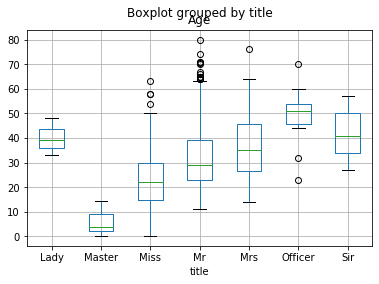

In [148]:
#Box Plot of Age with title

df[df.Age.notnull()].boxplot('Age', 'title')

In [149]:
#replace :
title_age_median = df.groupby('title').Age.transform('median')
df.Age.fillna(title_age_median, inplace = True)

In [ ]:
df.info()

# working with outliers

## Age

In [ ]:
# using histogram to understand the distribution
df.Age.plot(kind='hist', bins = 20, color= 'c')

In [ ]:
df.loc[df.Age>70]

## Fare

In [ ]:
#histogram for fare
df.Fare.plot(kind = 'hist', title = 'histogram for fare', bins=20, color='b');


In [ ]:
#box plot to identify outliners
df.Fare.plot(kind='box');

In [ ]:
#look for outliers

df.loc[df.Fare == df.Fare.max()]

#### Transformation

In [ ]:
#Try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) #adding 1 to accomodate zero fares: log(0) not define

In [ ]:
#histogram for LogFare
LogFare.plot(kind= 'hist', color='r', bins= 20);

##### binning

In [150]:
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [151]:
pd.qcut(df.Fare, 4, labels = ['very_low', 'low', 'high', 'very_high']) #discretization

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

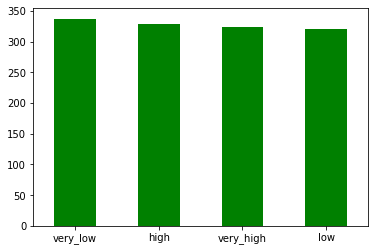

In [152]:
pd.qcut(df.Fare, 4, labels = ['very_low', 'low', 'high', 'very_high']). value_counts().plot(kind='bar', color='g', rot = 0);

In [153]:
#create fare bin feature

df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels = ['very_low', 'low', 'high', 'very_high'])

# Feature Engineering

##### feature : Age State (Adult or Child)

In [154]:
#AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18 , 'Adult', 'Child')

In [155]:
#AgeState Counts
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [156]:
##crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


# Feature : FamilySize

In [157]:
# Family : Adding parents with siblings
df['FamilySize'] = df.Parch + df.SibSp +1 #for self

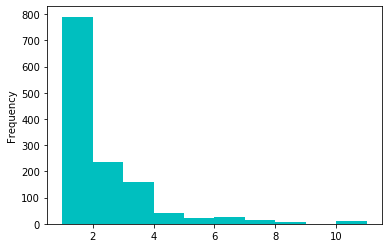

In [158]:
#explore thhe family feature
df['FamilySize'].plot(kind = 'hist', color='c');

In [159]:
#further explore this family with max family member
df.loc[df.FamilySize == df.FamilySize.max(), ['Name', 'Survived', 'FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [160]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


# Feature: IsMother

In [161]:
# a lady aged more than 18 who has parch > 0 and is married (not miss)
df['IsMother'] = np.where(((df.Sex == 'female')& (df.Parch>0) & (df.Age> 18)&(df.title != 'Miss')),1,0)

In [ ]:
#crosstab with IsMother
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

# Feature: Deck (for position of a person)

In [ ]:
#explore Cabin values
df.Cabin

In [ ]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()


In [162]:
# look at the Cabin= T
df.loc[df.Cabin == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,very_high,Adult,1,0


In [163]:
#set the value to NaN
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [164]:
#look at the unique values of cabin agian
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [165]:
#extract first character of cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(),'z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x) )

In [166]:
#check count
df.Deck.value_counts()

z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [167]:
#use crosstab to look into survived feature cabin wise
pd.crosstab(df[df.Survived != -888]. Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Ticket      1309 non-null   object  
 8   Fare        1309 non-null   float64 
 9   Cabin       294 non-null    object  
 10  Embarked    1309 non-null   object  
 11  title       1309 non-null   object  
 12  Fare_Bin    1309 non-null   category
 13  AgeState    1309 non-null   object  
 14  FamilySize  1309 non-null   int64   
 15  IsMother    1309 non-null   int32   
 16  Deck        1309 non-null   object  
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 170.2+ KB


# Categorical faeture encoding

In [169]:
#sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [170]:
#columns Deck, Pclass, Title, Agestate

df = pd.get_dummies(df,columns = ['Pclass','Deck','title','Fare_Bin', 'Embarked'])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   AgeState            1309 non-null   object 
 4   FamilySize          1309 non-null   int64  
 5   IsMother            1309 non-null   int32  
 6   IsMale              1309 non-null   int32  
 7   Pclass_1            1309 non-null   uint8  
 8   Pclass_2            1309 non-null   uint8  
 9   Pclass_3            1309 non-null   uint8  
 10  Deck_A              1309 non-null   uint8  
 11  Deck_B              1309 non-null   uint8  
 12  Deck_C              1309 non-null   uint8  
 13  Deck_D              1309 non-null   uint8  
 14  Deck_E              1309 non-null   uint8  
 15  Deck_F              1309 non-null   uint8  
 16  Deck_G

# Drop and reorder columns


In [ ]:
#drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis =1, inplace=True)

In [ ]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived']+ columns
df = df[columns]

In [ ]:
df.info()

# Save processed dataset/Dataframe

In [ ]:
#processed_data_path = os.path.join(os.path.pardir,'data', 'processed')
#write_train_path = os.path.join(processed_data_path, 'train.csv')
#write_test_path = os.path.join(processed_data_path, 'test.csv')

In [ ]:
#train data
df.loc[df.Survived != -888].to_csv(r'C:\Users\sabar\pluralsight\Titanic_data\Train.csv')
#test data
columns = [column for column in df.columns if column != 'Survived']#creating a survived column with no results
df.loc[df.Survived == -888, columns].to_csv(r'C:\Users\sabar\pluralsight\Titanic_data\Test.csv')#removing survied column

# Building the data processing script 

In [ ]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    # set the path of the raw data
 #   raw_data_path = os.path.join(os.path.pardir,'data','raw')
  #  train_file_path = os.path.join(raw_data_path, 'train.csv')
    #test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read the data with all default parameters
    #train_df = pd.read_csv(train_file_path, index_col='PassengerId')
  #  test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    
    train_df = pd.read_csv(r"C:\Users\sabar\OneDrive\Desktop\Sowjanya\Pluralsight\python-data-science\titanic_data\titanic\train.csv", index_col= "PassengerId")
    test_df  = pd.read_csv(r"C:\Users\sabar\OneDrive\Desktop\Sowjanya\Pluralsight\python-data-science\titanic_data\titanic\test.csv",index_col= "PassengerId")
    
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0)
    return df



def process_data(df):
    # using the method chaining concept
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         # reorder columns
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

    
def write_data(df):
   # processed_data_path = os.path.join(os.path.pardir,'data','processed')
    #write_train_path = os.path.join(processed_data_path, 'train.csv')
    #write_test_path = os.path.join(processed_data_path, 'test.csv')
    # train data
  #  df[df.Survived != -888].to_csv(write_train_path) 
    df[df.Survived != -888].to_csv(r'C:\Users\sabar\pluralsight\Titanic_data\train.csv')

    # test data
    columns = [column for column in df.columns if column != 'Survived']
    #df[df.Survived == -888][columns].to_csv(write_test_path) 
    df[df.Survived == -888][columns].to_csv(r'C:\Users\sabar\pluralsight\Titanic_data\test.csv')#removing survied column

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

In [ ]:
!python $get_processed_data_script_file

In [ ]:
train_df = pd.read_csv(r"C:\Users\sabar\OneDrive\Desktop\Sowjanya\Pluralsight\python-data-science\titanic_data\titanic\train.csv", index_col= "PassengerId")
train_df.info()

In [ ]:
test_df = pd.read_csv(r"C:\Users\sabar\OneDrive\Desktop\Sowjanya\Pluralsight\python-data-science\titanic_data\titanic\test.csv", index_col= "PassengerId")
test_df.info()

# Matplotlib for advance visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline